In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [112]:
num_alunos = 1000
faixa_idade = (16,30)
faixa_horas_estudo = (1,20)
faixa_notas = (1.0,10.0)
areas = ['ciencia da computacao', 'eng eletrica', 'matematica', 'fisica']


In [113]:
alunos = []
for i in range(num_alunos):
  idade = np.random.randint(faixa_idade[0], faixa_idade[1]+1)
  nota = np.random.randint(faixa_notas[0], faixa_notas[1])
  horas_estudo = np.random.randint(faixa_horas_estudo[0], faixa_horas_estudo[1]+1)
  area = np.random.choice(areas)
  alunos.append({'idade':idade, 'notas':nota, 'horas_estudo':horas_estudo, 'formacao':area})

In [114]:
df_alunos = pd.DataFrame(alunos)

In [115]:
df_alunos.to_csv('dados_alunos.csv', index=False)

In [116]:
df_alunos['desempenho'] = ['alto' if x > 5 else 'baixo' for x in df_alunos['notas']]

In [ ]:
df_alunos.describe()

In [119]:
X = df_alunos[['idade','notas', 'horas_estudo']]
y = df_alunos['desempenho']

In [121]:
X_train, X_test, y_train,  y_test = train_test_split(X,y , test_size=0.2, random_state=50)

In [122]:
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=5)

In [123]:
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
score = modelo_rf.score(X_test, y_test)
print(f'accuracy:{score}')

In [125]:
alunos_d = []
for i in range(num_alunos):
  idade = np.random.randint(faixa_idade[0], faixa_idade[1]+1)
  nota = np.random.randint(faixa_notas[0], faixa_notas[1])
  horas_estudo = np.random.randint(faixa_horas_estudo[0], faixa_horas_estudo[1]+1)
  area = np.random.choice(areas)
  alunos.append({'idade':idade, 'notas':nota, 'horas_estudo':horas_estudo, 'formacao':area})

In [99]:
# new_data = pd.DataFrame(alunos_d)

In [126]:
novos_dados = pd.read_csv('dados_alunos.csv')

In [127]:
previsao = modelo_rf.predict(novos_dados[['idade', 'notas','horas_estudo']])


In [128]:
novos_dados['desempenho'] = previsao

In [129]:
novos_dados.to_csv('novos.csv')

In [130]:
novos_dados

,idade,notas,horas_estudo,formacao,desempenho
0,20,2,9,ciencia da computacao,baixo
1,20,8,5,fisica,alto
2,20,4,8,eng eletrica,baixo
3,19,5,5,fisica,baixo
4,19,1,16,eng eletrica,baixo
...,...,...,...,...,...
995,19,1,3,fisica,baixo
996,29,9,9,ciencia da computacao,alto
997,16,8,11,eng eletrica,alto
998,21,6,4,fisica,alto


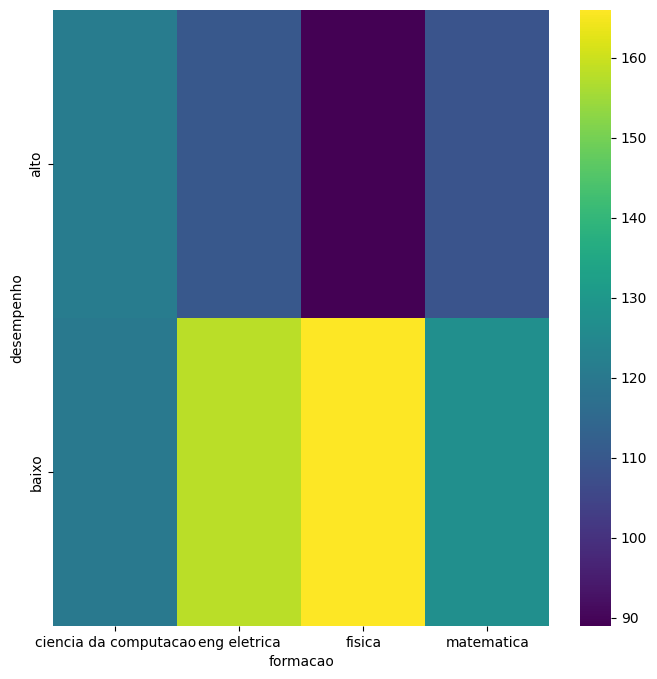

In [132]:
# @title formacao vs desempenho

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['desempenho'].value_counts()
    for x_label, grp in novos_dados.groupby('formacao')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('formacao')
_ = plt.ylabel('desempenho')

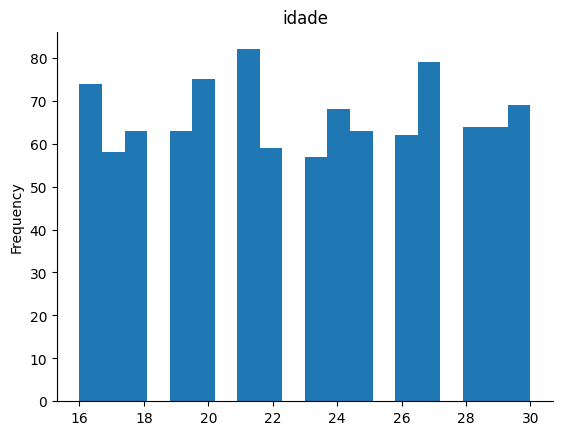

In [131]:
# @title idade

from matplotlib import pyplot as plt
novos_dados['idade'].plot(kind='hist', bins=20, title='idade')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [95]:
# for i in range(30):
#   new_data = pd.DataFrame({'idade':[i], 'notas':[1], 'horas_estudo':[i]})
#   previsao = modelo_rf.predict(new_data)
#   print(f'DESEMPENHO: {previsao}')


DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']
DESEMPENHO: ['baixo']


<Axes: xlabel='formacao'>

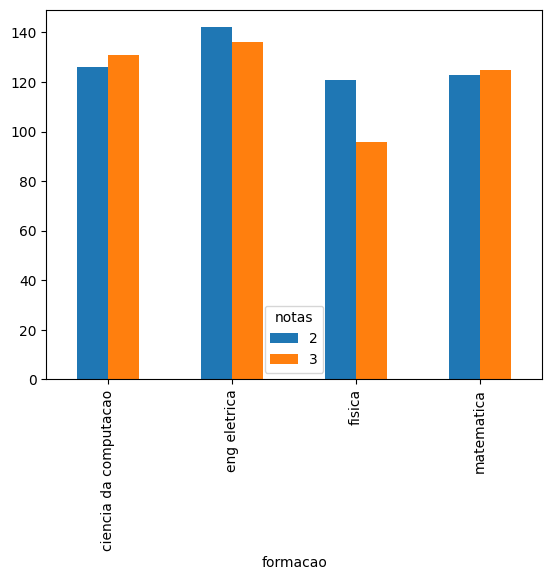

In [14]:
# @title Distribution of Grades by Major

df_alunos.groupby(['formacao', 'notas']).size().unstack().plot(kind='bar')